<a href="https://colab.research.google.com/github/aayushmanda/da6401_assignment2/blob/main/da6401_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1

In [1]:
!wget https://storage.googleapis.com/wandb_datasets/nature_12K.zip

--2025-04-01 18:49:26--  https://storage.googleapis.com/wandb_datasets/nature_12K.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.207, 74.125.197.207, 74.125.135.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3816687935 (3.6G) [application/zip]
Saving to: ‘nature_12K.zip.1’

nature_12K.zip.1    100%[===================>]   3.55G   195MB/s    in 22s     

2025-04-01 18:49:48 (168 MB/s) - ‘nature_12K.zip.1’ saved [3816687935/3816687935]



In [2]:
!unzip nature_12K.zip

Archive:  nature_12K.zip
replace inaturalist_12K/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
train_dir='inaturalist_12K/train/'
test_dir='inaturalist_12K/val/'
categories=['Amphibia','Animalia','Arachnida','Aves','Fungi','Insecta','Mammalia','Mollusca','Plantae','Reptilia']



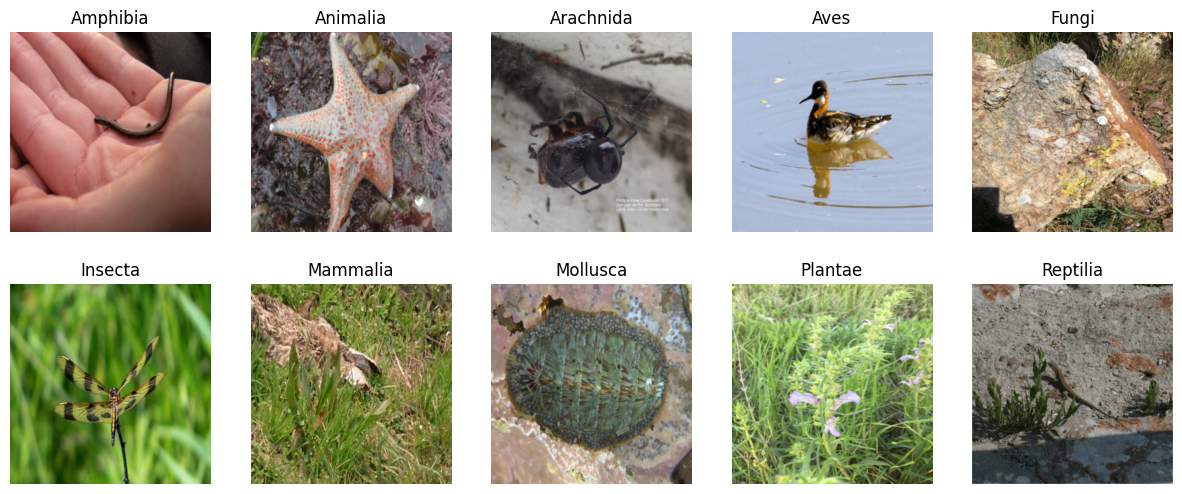

In [4]:
import torch
import torchvision
from torchvision.io import read_image
from torchvision.transforms import Resize, ToPILImage
import matplotlib.pyplot as plt
import os

# Initialize figure
fig = plt.figure(figsize=(15, 6))
rows, columns = 2, 5
i = 1

# Loop through categories
for category in categories:
    dir_path = os.path.join(train_dir, category)

    for img_name in os.listdir(dir_path):
        img_path = os.path.join(dir_path, img_name)

        # Read image using PyTorch
        img_tensor = read_image(img_path)
        # Resize image using torchvision transforms
        resize_transform = Resize((300, 300))
        resized_img_tensor = resize_transform(img_tensor)

        # Convert tensor to PIL image for visualization
        pil_img = ToPILImage()(resized_img_tensor)

        # Add subplot and display image
        fig.add_subplot(rows, columns, i)
        plt.imshow(pil_img)
        plt.axis('off')
        plt.title(category)

        i += 1
        break  # Show only one image per category

plt.show()


In [5]:
# !ls 'inaturalist_12K/train/Amphibia'

In [26]:
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


# Define directories
train_dir = 'inaturalist_12K/train/'
test_dir = 'inaturalist_12K/val/'

# Define transformations with additional augmentations
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(brightness=0.2, contrast=0.2),
        transforms.RandomRotation(15),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Create datasets
image_datasets = {
    'train': datasets.ImageFolder(train_dir, data_transforms['train']),
    'val': datasets.ImageFolder(test_dir, data_transforms['val'])
}

# Create dataloaders with pin_memory and dynamic batch size
dataloaders = {
    'train': DataLoader(image_datasets['train'], batch_size=64, shuffle=True, num_workers=4, pin_memory=True),
    'val': DataLoader(image_datasets['val'], batch_size=64, shuffle=False, num_workers=4)
}

# # Get dataset sizes and class names
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

# # Set device for training
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Print summary information
print(f"Training dataset size: {dataset_sizes['train']}")
print(f"Validation dataset size: {dataset_sizes['val']}")

print(f"Class names: {class_names}")
print(f"Using device: {device}")


Training dataset size: 9999
Validation dataset size: 2000
Class names: ['Amphibia', 'Animalia', 'Arachnida', 'Aves', 'Fungi', 'Insecta', 'Mammalia', 'Mollusca', 'Plantae', 'Reptilia']
Using device: cuda:0
time: 32.1 ms (started: 2025-04-01 19:16:42 +00:00)


In [7]:
# from torch.utils.data import DataLoader, Subset
# subset_size = 8000  # Specify the desired size of the subset
# indices = range(subset_size)
# train_dataset = Subset(image_datasets['train'], indices) # Create the subset
# indices = range(subset_size, subset_size+1999)
# val_dataset = Subset(image_datasets['train'], indices)
# test_dataset = image_datasets['test']

# dataloaders = {
#     'train': DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4, pin_memory=True),
#     'val': DataLoader(val_dataset, batch_size=32, shuffle=True, num_workers=4),
#     'test': DataLoader(test_dataset, batch_size=32, shuffle=True, num_workers=4)
# }

# dataset_sizes = {
#     'train': len(train_dataset),
#     'val': len(val_dataset),
#     'test': len(test_dataset)
# }


# # Print summary information
# print(f"Training dataset size: {len(train_dataset)}")
# print(f"Validation dataset size: {len(val_dataset)}")
# print(f"Test dataset size: {len(test_dataset)}")
# print(f"Class names: {class_names}")
# print(f"Using device: {device}")


Training dataset size: 8000
Validation dataset size: 1999
Test dataset size: 2000
Class names: ['Amphibia', 'Animalia', 'Arachnida', 'Aves', 'Fungi', 'Insecta', 'Mammalia', 'Mollusca', 'Plantae', 'Reptilia']
Using device: cuda:0


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class FlexibleCNN(nn.Module):
    def __init__(self,
                 input_channels=3,
                 num_classes=10,
                 num_conv_layers=5,
                 conv_filters=32,
                 filter_size=3,
                 activation_func=nn.ReLU,
                 dense_neurons=512,
                 dropout_rate=0.25):

        super().__init__()

        self.conv_blocks = nn.ModuleList()
        in_channels = input_channels

        # Adding convolution-activation-batchnorm-maxpool blocks
        for _ in range(num_conv_layers):
            self.conv_blocks.append(nn.Sequential(
                nn.Conv2d(in_channels=in_channels, out_channels=conv_filters,
                          kernel_size=filter_size, stride=1, padding=filter_size//2),
                nn.BatchNorm2d(conv_filters),  # Adding Batch Normalization
                activation_func(),
                nn.MaxPool2d(kernel_size=2)
                # nn.Dropout2d(0.4)
            ))
            in_channels = conv_filters

        # Flatten layer
        self.flatten = nn.Flatten()

        # Calculating input size for the first fully connected layer
        input_size = conv_filters * (224 // (2**num_conv_layers))**2  # Calculate input size dynamically

        # Fully connected layers with Dropout
        self.fc1 = nn.Linear(input_size, dense_neurons)  # Use calculated input size
        self.dropout = nn.Dropout(dropout_rate)  # Adding Dropout layer
        self.fc2 = nn.Linear(dense_neurons, num_classes)

    def forward(self, x):
        for block in self.conv_blocks:
            x = block(x)
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)  # Apply Dropout during training
        x = self.fc2(x)
        return x

# Example instantiation
model = FlexibleCNN(input_channels=3, num_classes=10, num_conv_layers=5,
                    conv_filters=48, filter_size=5, activation_func=nn.ReLU,
                    dense_neurons=512)

print(model)


FlexibleCNN(
  (conv_blocks): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1-3): 3 x Sequential(
      (0): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=9408, out_features=256, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)


In [9]:
!pip install ipython-autotime
%load_ext autotime

time: 227 µs (started: 2025-04-01 18:53:14 +00:00)


In [10]:
import numpy as np

time: 231 µs (started: 2025-04-01 18:53:14 +00:00)


In [11]:
# torch.eye(10, 10, device=labels.device)[labels].shape

time: 213 µs (started: 2025-04-01 18:53:14 +00:00)


In [12]:
# torch.eye(10, 10, device=labels.device)[labels].shape, outputs.shape

time: 203 µs (started: 2025-04-01 18:53:14 +00:00)


In [13]:
# inputs.shape, labels.shape

time: 189 µs (started: 2025-04-01 18:53:14 +00:00)


In [14]:
# model(inputs).shape

time: 199 µs (started: 2025-04-01 18:53:14 +00:00)


In [15]:
# criterion(model(inputs), torch.eye(10, 10, device=labels.device)[labels])

time: 165 µs (started: 2025-04-01 18:53:14 +00:00)


In [16]:

# torch.max(outputs, 1)

time: 168 µs (started: 2025-04-01 18:53:14 +00:00)


In [17]:

# torch.max(model(inputs), 1)

time: 164 µs (started: 2025-04-01 18:53:14 +00:00)


time: 4.38 ms (started: 2025-04-01 18:53:14 +00:00)


### Estimated training time is 10 mins for 5 epoch with batch_size=64

In [22]:

import torch.optim as optim
import time

# Hyperparameters
num_epochs = 5  # Number of epochs to train
learning_rate = 1e-4  # Learning rate

# Set up the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Loss function for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=learning_rate)  # Adam optimizer

# Move model to the appropriate device


def initialize_weights(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
        nn.init.kaiming_normal_(m.weight, nonlinearity='relu')
        if m.bias is not None:
            nn.init.constant_(m.bias, 0)

model.apply(initialize_weights)


# Training loop with test evaluation
lossi = []
best_val_acc = 0.0

for epoch in range(num_epochs):
    print(f'Epoch {epoch + 1}/{num_epochs}')
    print('-' * 10)

    # Training and validation phases
    for phase in ['train', 'test']:
        if phase == 'train':
            model.train()
        else:
            model.eval()

        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in dataloaders[phase]:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()

            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                if phase == 'train':
                    loss.backward()
                    optimizer.step()
                    lossi.append(loss.item())

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / dataset_sizes[phase]
        epoch_acc = running_corrects.double() / dataset_sizes[phase]
        print(f'{phase} Loss: {epoch_loss:.4f} | Acc: {epoch_acc:.4f}')

        # Track best validation accuracy
        if phase == 'val' and epoch_acc > best_val_acc:
            best_val_acc = epoch_acc



Epoch 1/5
----------
train Loss: 2.3185 | Acc: 0.1848
test Loss: 2.0966 | Acc: 0.2365
Epoch 2/5
----------
train Loss: 2.1397 | Acc: 0.2308
test Loss: 2.0246 | Acc: 0.2805
Epoch 3/5
----------
train Loss: 2.1129 | Acc: 0.2335
test Loss: 1.9909 | Acc: 0.2875
Epoch 4/5
----------
train Loss: 2.0746 | Acc: 0.2522
test Loss: 1.9705 | Acc: 0.3055
Epoch 5/5
----------
train Loss: 2.0525 | Acc: 0.2612
test Loss: 1.9500 | Acc: 0.3190

Final Test Evaluation:
Test Loss: 1.9500 | Test Acc: 0.3190
Best Validation Accuracy: 0.0000
time: 10min 29s (started: 2025-04-01 19:05:18 +00:00)


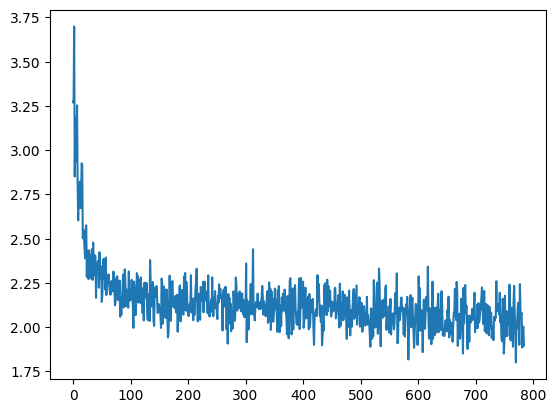

time: 229 ms (started: 2025-04-01 19:16:14 +00:00)


In [23]:
plt.plot(torch.tensor(lossi))

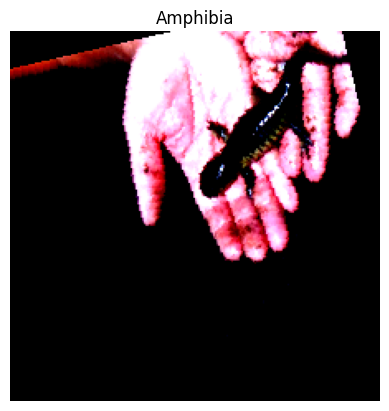

time: 138 ms (started: 2025-04-01 19:16:21 +00:00)


In [24]:
import matplotlib.pyplot as plt

def visualize_transforms(dataset):
    img, label = dataset[50]  # Get one sample
    plt.imshow(img.permute(2, 1, 0))  # Change from CxHxW to HxWxC for visualization
    plt.title(class_names[label])
    plt.axis('off')
    plt.show()

visualize_transforms(image_datasets['train'])

# Problem 2

In [28]:
import torch
import torch.nn as nn
from torchvision import models
import torch.optim as optim

# Hyperparameters
num_epochs = 5  # Number of epochs to train
learning_rate = 1e-4  # Learning rate (0.001 as specified)

# Load pre-trained ResNet50
model = models.resnet50(pretrained=True)

# Freeze all layers
for param in model.parameters():
    param.requires_grad = False

# Replace the final layer
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 10)

# Ensure the new layer is trainable
for param in model.fc.parameters():
    param.requires_grad = True

# Set up the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Loss function for multi-class classification
optimizer = optim.Adam(model.fc.parameters(), lr=learning_rate)  # Optimize only the final layer

# Move model to the appropriate device (assuming device is defined, e.g., 'cuda' or 'cpu')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Training loop with test evaluation
lossi = []
best_val_acc = 0.0

for epoch in range(num_epochs):
    print(f'Epoch {epoch + 1}/{num_epochs}')
    print('-' * 10)

    # Training and validation phases
    for phase in ['train', 'val']:
        if phase == 'train':
            model.train()
        else:
            model.eval()

        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in dataloaders[phase]:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()

            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                if phase == 'train':
                    loss.backward()
                    optimizer.step()
                    lossi.append(loss.item())

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / dataset_sizes[phase]
        epoch_acc = running_corrects.double() / dataset_sizes[phase]
        print(f'{phase} Loss: {epoch_loss:.4f} | Acc: {epoch_acc:.4f}')

        # Track best validation accuracy
        if phase == 'val' and epoch_acc > best_val_acc:
            best_val_acc = epoch_acc




Epoch 1/5
----------
train Loss: 1.9269 | Acc: 0.4371
val Loss: 1.4904 | Acc: 0.6800
Epoch 2/5
----------
train Loss: 1.4594 | Acc: 0.6288
val Loss: 1.1452 | Acc: 0.7335
Epoch 3/5
----------
train Loss: 1.2367 | Acc: 0.6608
val Loss: 0.9826 | Acc: 0.7495
Epoch 4/5
----------
train Loss: 1.1298 | Acc: 0.6697
val Loss: 0.8943 | Acc: 0.7620
Epoch 5/5
----------
train Loss: 1.0647 | Acc: 0.6808
val Loss: 0.8250 | Acc: 0.7625
time: 10min 29s (started: 2025-04-01 19:29:39 +00:00)


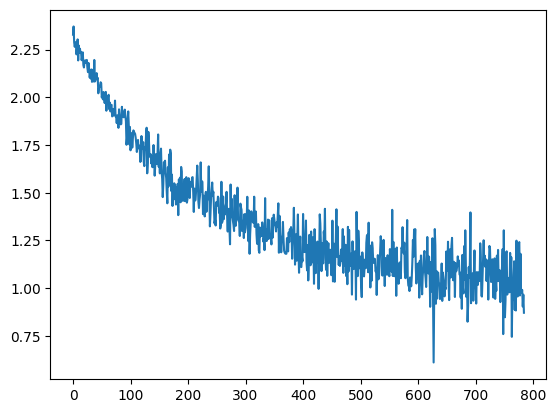

time: 182 ms (started: 2025-04-01 19:40:09 +00:00)


In [29]:
plt.plot(torch.tensor(lossi))

time: 4min 52s (started: 2025-04-01 19:40:09 +00:00)
